## Oklahoma purchase credit card transactions project

###  Vicky Ma
The Office of Management and Enterprise Services in the State of Oklahoma has made its purchase credit card transactions available. This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions.

# Table of Content
### [Section 1 Data Preparation](#1)
#### 1.1 Data Exploration
#### 1.2 Create Data Fields
### [Section 2 Initial Observations](#Section 2 Initial Observation)
#### 2.1 Understanding Categorical Variables
#### 2.2 Understanding Numerical Variables
#### 2.3 Identify Outliers and Anomalies
#### 2.4 Identify Correlation
### [Section 3 Feature Engineering](#3)
#### 3.1 Feature 1: The Ratio to Average Amount
#### 3.2 Feature 2: The Ratio to Median Amount
#### 3.3 Feature 3 : Creating a Binary Feature for High-Spending Category
#### 3.4 Feature 4: Total Amount by Agency, Merchant Category, and Month
#### 3.5 Feature 5: Average Amount by Agency, Merchant Category, and Month
#### 3.6 Feature 6 : Day of the Week
#### 3.7 Feature 7: Week of the Month
#### 3.8 Feature 8 : Weekend Transactions
#### 3.9 Feature 9 : Month-End Transactions
#### 3.10 Feature 10 : Transaction Frequency by Cardholder
#### 3.11 Feature 11 : Transaction Frequency by Vendor
#### 3.12 Feature 12 : Average Transaction Amount by Vendor
#### 3.13 Feature 13 : Transaction Frequency by Day of the Week
#### 3.14 Feature 14 : Transaction Frequency by Merchant Category
#### 3.15 Feature 15 : Identify Transaction Amount Outliners by Merchant Category
### [Section 4 Project Finalization](#4)
#### 4.1 Merge df1, df2 into my datafram
#### 4.2 Summary

# Section 1 Data Preparation

In [4]:
import pandas as pd
df = pd.read_csv('purchase_credit_card.csv')
df.head(5)  

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


## 1.1 Data exploration

In [5]:
# check dimensions of the dataset
print(df.shape)

(442458, 11)


In [6]:
# check general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


#### the dataset has 442,458 rows and 11 columns 

In [7]:
# check column names
print(df.columns) 

Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


#### column names are inconsistant in their forms, so I consider to change the column names to add "_" in each space area.

In [8]:
# Get the Simple Summary Statistics 
df.describe() 

,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


These summary statistics provide a quick overview of the central tendency, spread, and distribution of the numerical columns in the dataset, helping to understand the data's characteristics. It's important to further investigate potential outliers and anomalies, especially in the 'Amount' column where negative values and extremely large values are observed.

In [9]:
# change column names, so it is easier for further analysis.
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

## 1.2 Create Data Fields

### This part is aimed at preprocessing and feature engineering on the DataFrame named 'df,' likely part of the dataset being analyzed. The step by step explanation of the operations being performed is showing below:

#### 1. Creating Year and Month Columns:
Two new columns, 'Year' and 'Month,' are created to separate the year and month from the 'Year_Month' column for future feature engineering.

#### 2. Converting Date Columns to Datetime:
The 'Transaction_Date' and 'Posted_Date' columns are converted from the Python object data type to the datetime data type using pd.to_datetime.

#### 3. Converting 'Year_Month' to Datetime:
The 'Year_Month' column is converted to datetime format using pd.to_datetime with a specified format '%Y%m' to ensure proper conversion.

#### 4. Extracting Year and Month:
The 'Year' and 'Month' columns are extracted from the 'Year_Month' column using the dt.year and dt.month functions, respectively.

#### 5. Creating 'Week_Number':
A new column 'Week_Number' is created, representing the week number corresponding to each entry in the 'Transaction_Date' column. This is obtained using dt.isocalendar().week.

#### 6. Creating 'Day_of_Week':
A new column 'Day_of_Week' is created to represent the day of the week for each transaction in the 'Transaction_Date' column. The day names are mapped using a dictionary that associates numerical day indices with day names.

#### 7. Counting Day_of_Week:
The count of transactions for each day of the week is obtained using value_counts() on the 'Day_of_Week' column.

The operations described above are essential preprocessing and feature engineering steps. These features could be used for further analysis, anomaly detection, or other insights related to transaction data based on dates.

In [10]:
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')

#Creating separate Year and Month columns for future feature engineering
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month

#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

# Section 2 Initial observations

## 2.1 Understanding categorical variables

I will create 3 visualizations related to agency names, merchant categories, and day of the week for the dataset in this part.
 1. A bar plot is generated using Seaborn (sns.barplot) to visualize the top 20 agencies by transaction count, using the sorted df_count DataFrame.
 2. A pie chart is created to visualize the distribution of transactions for the top 10 merchant categories using plt.pie.
 3. I used sns.countplot to visualize the count of transactions for each day of the week ('Day_of_Week') in the dataset. The order of days is specified for better visualization using the order parameter.

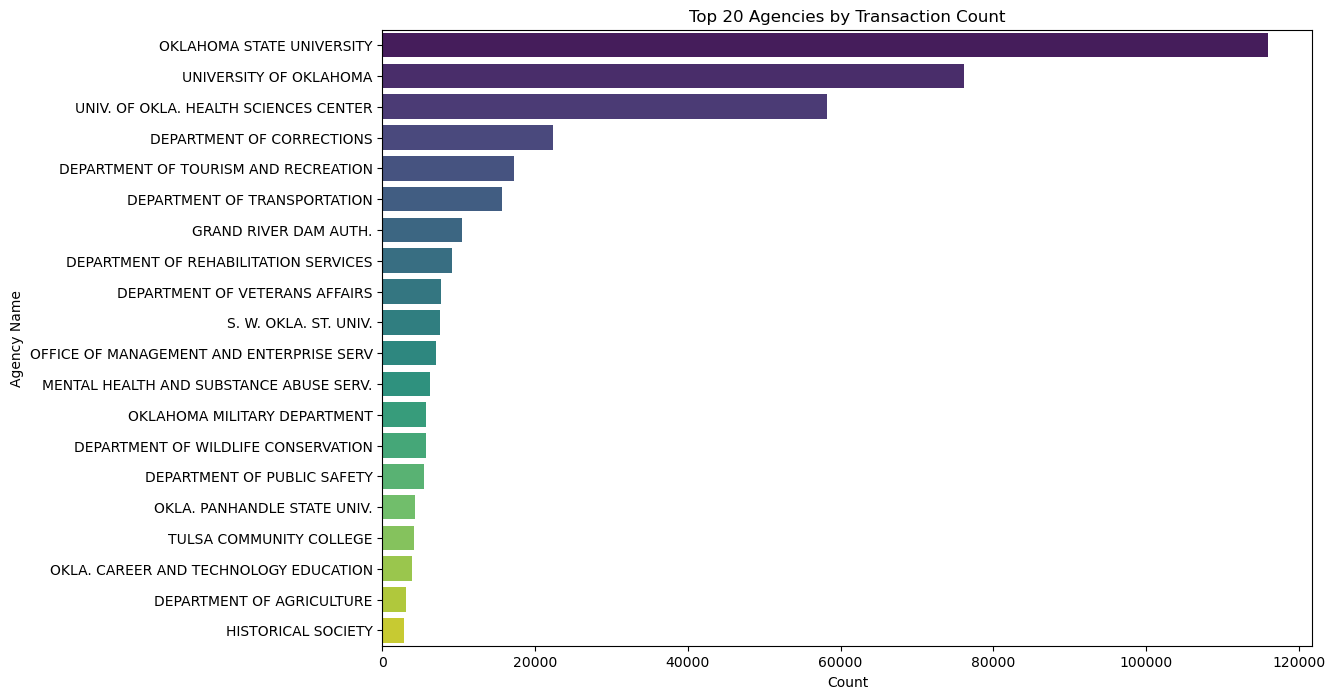

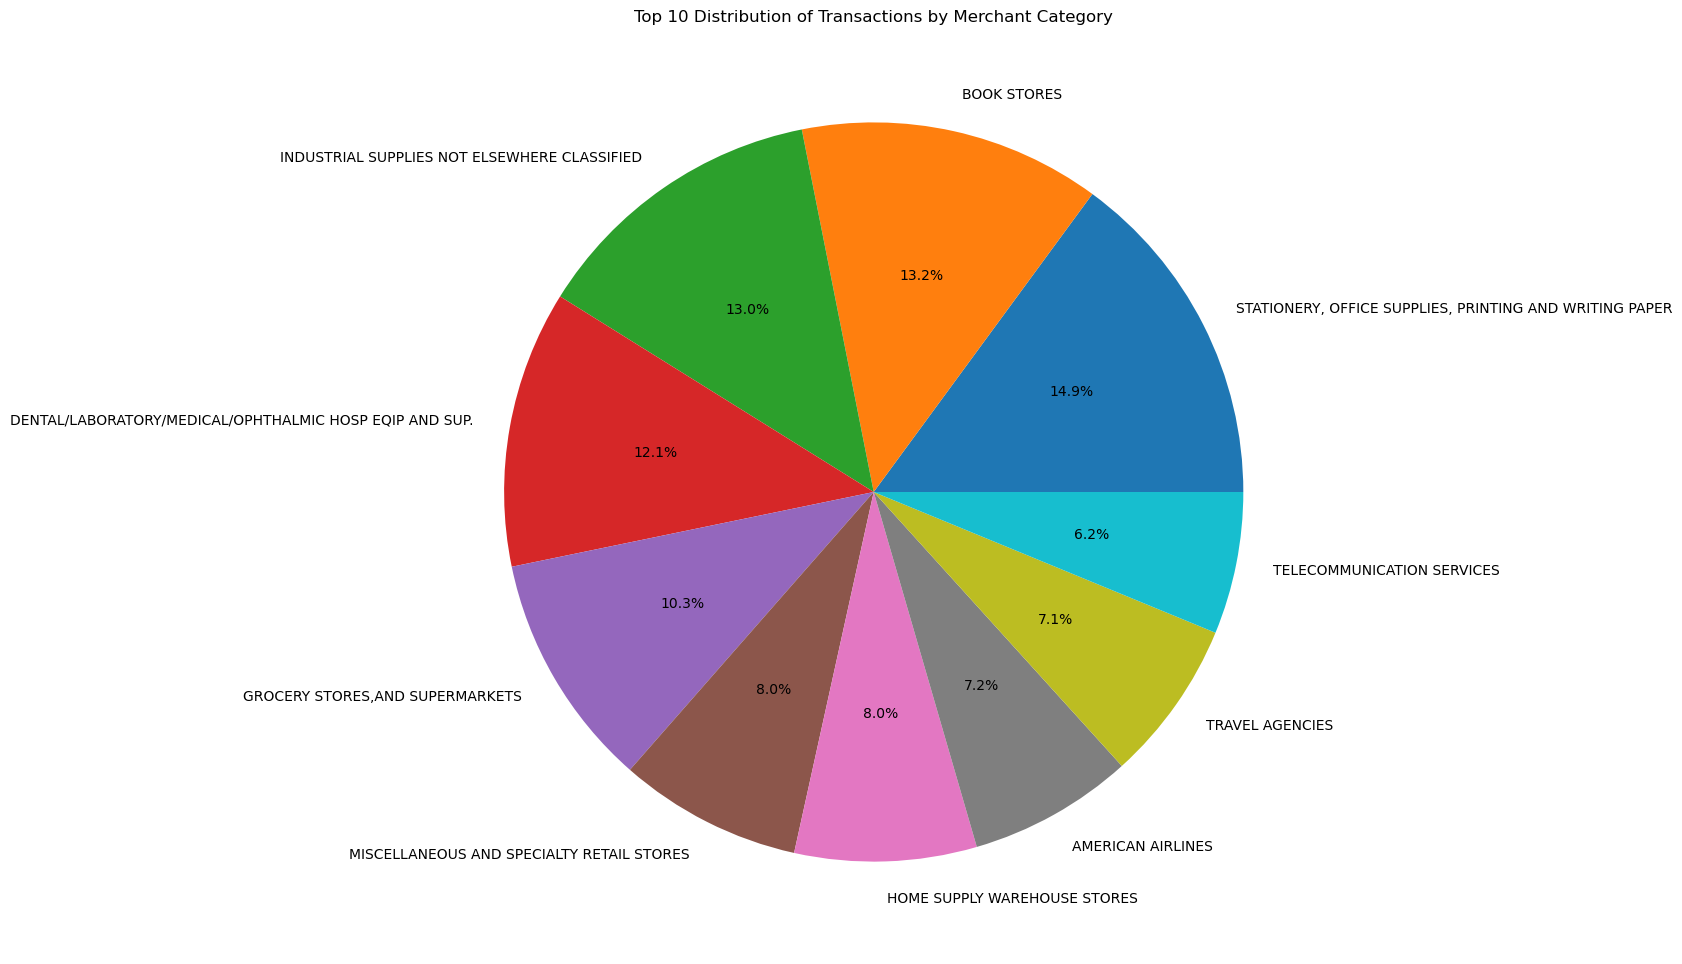

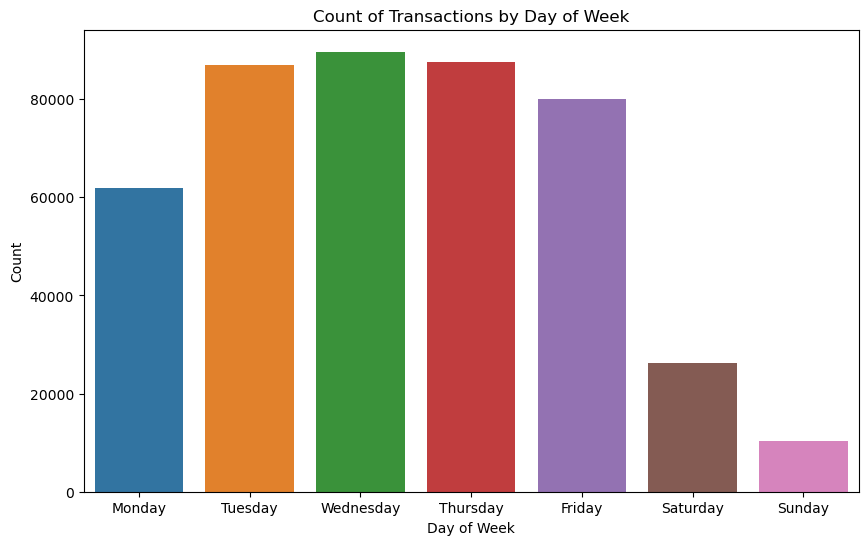

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize the count statistics by agency_name in df_count
df_count = df['Agency_Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency_Name', 'Count']

# Sort the dataframe by count in descending order
df_count_sorted = df_count.sort_values(by='Count', ascending=False)

# Plot the top 20 agencies by count using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y='Agency_Name', x='Count', data=df_count_sorted.head(20), palette='viridis')
plt.xlabel('Count')
plt.ylabel('Agency Name')
plt.title('Top 20 Agencies by Transaction Count')
plt.show()

# Visualize the top 20 Merchant_Category using a pie chart
merchant_category_counts = df['Merchant_Category'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(merchant_category_counts.head(10), labels=merchant_category_counts.head(10).index, autopct='%1.1f%%')
plt.title('Top 10 Distribution of Transactions by Merchant Category')
plt.show()

# Visualize Day_of_Week using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week',data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Transactions by Day of Week')
plt.show()

### Interpretation of visulizations:
1. bar plot shows that 'OKALAHOMA STATE UNIVERSITY' has most transactions, followed by 'UNIVERSITY OF OKLAHOMA'

2. most transcations (14.9%) occured in 'STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER' category, followed by 'BOOK STORE ' category

3. the count of transactions by day of week shows most transcations occured during weekdays, especially through Tuesday to Thursday.

Using this analysis, I can create binary or categorical features based on specific merchant categories. For example, creating a binary feature indicating whether a transaction belongs to a particular high-spending category. or combining 'STATIONERY' and 'OFFICE SUPPLIES' into a single category might give a better understanding of business-related spending.

## 2.2 Understanding numerical variables

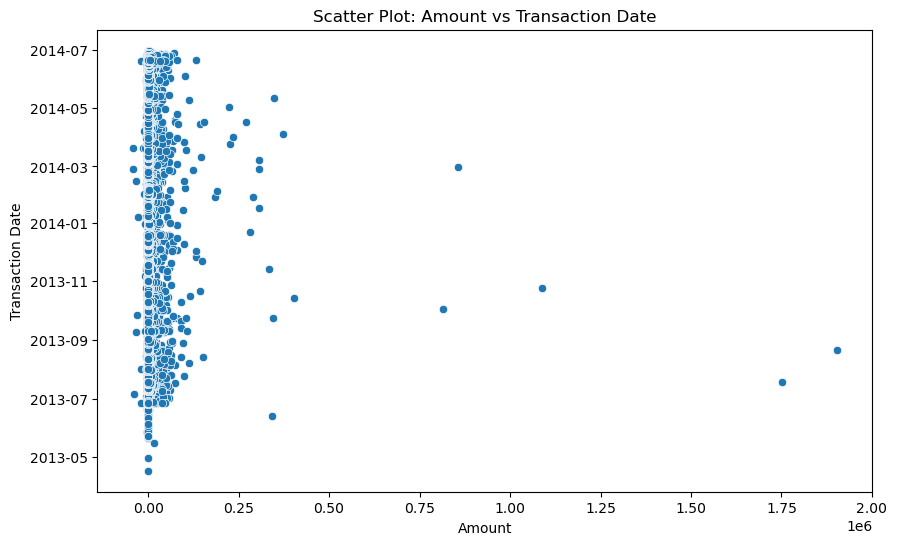

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for 'Amount' and 'Transcation_Date'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Transaction_Date', data=df)
plt.xlabel('Amount')
plt.ylabel('Transaction Date')
plt.title('Scatter Plot: Amount vs Transaction Date')
plt.show()

### Interpretation of scatter plot:
1. The scatter plot shows points where each point represents a transaction. The x-axis represents the transaction amount, and the y-axis represents the transaction date. The points are scattered across the plot based on these values.

2. From the scatter plot, I can observe how transaction amounts are distributed over time. The plot shows there is no significant seasonalities in transcationdate but the points that is far away from the scatter shows there's few unusual high amount in some of the transaction dates.

### This plot can guide my feature engineering by suggesting potential features related to time-dependent spending behaviors. For example:
1. Day of the Week: I could create a feature indicating which day of the week the transaction occurred on.
2. Week of the Month: I could create a feature representing which week of the month the transaction belongs to.
3. Weekend Transactions: I could create a binary feature indicating whether the transaction occurred on a weekend or not.
4. Month-End Transactions: I could create a binary feature indicating whether the transaction occurred near the end of the month when salaries are typically received.


## 2.3 Identify Outliers and Anomalies

I choose to use Box plot because it can clearly highlight outliers (data points significantly different from others) in the 'Amount' variable. Outliers might represent unusual transactions that could be indicative of fraud or errors.

Outliers can be treated as a separate category or flagged for further investigation in my feature engineering section. I may consider to create a binary feature indicating whether a transaction is an outlier or not.

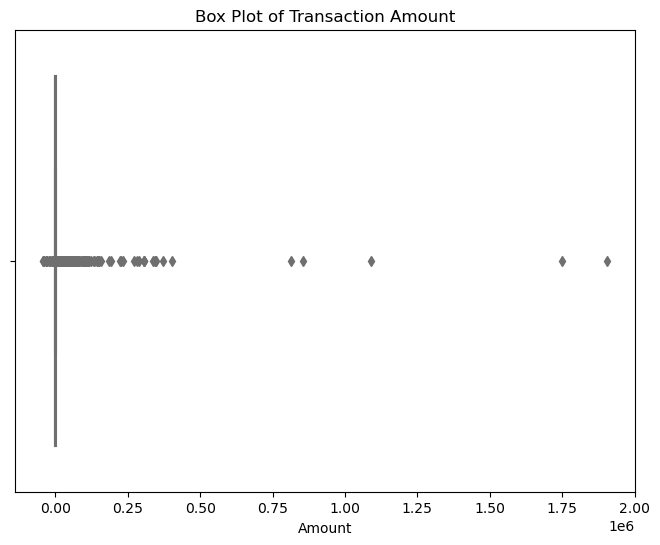

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()

## 2.4 Identify correlation
   1. Understanding the correlations between predictors and the target variable can guide feature selection and engineering for predictive modeling.
   2. Multicollinearity occurs when predictor variables are highly correlated. Detecting multicollinearity is crucial for creating a robust feature set that does not overly depend on a specific variable.

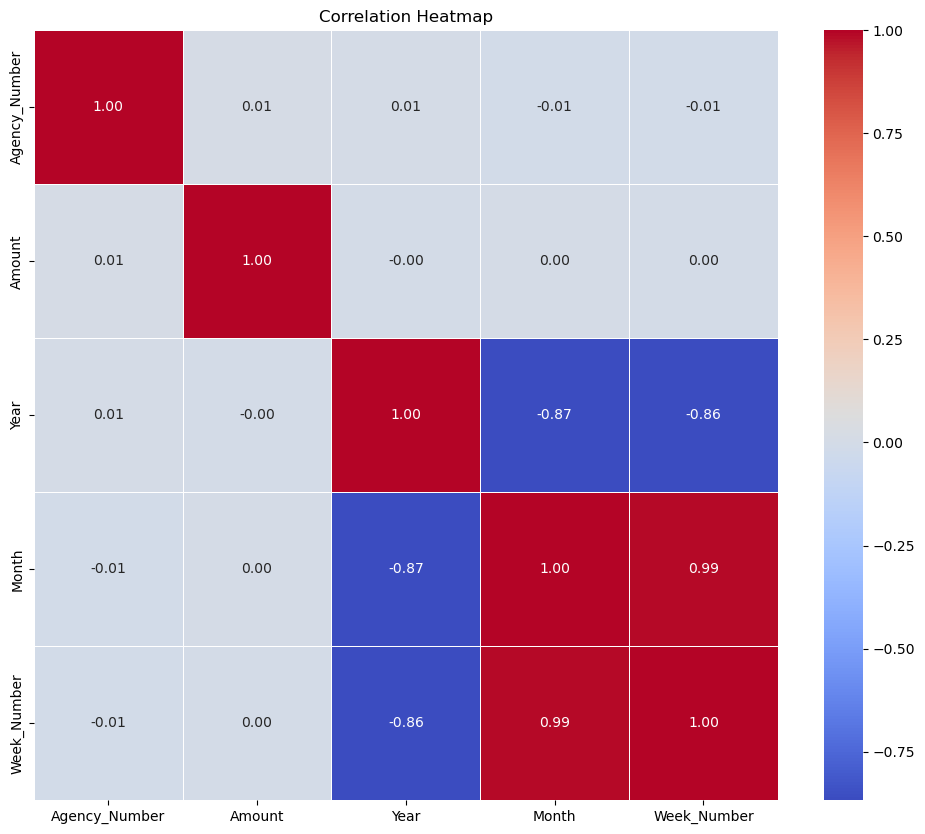

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Correlation analysis can suggest potential interactions or derived features. For instance, interactions between variables with high positive or negative correlation may be useful features.

# Section 3 Feature Engineering

- Understand the data grain: each row is a cardholder (last name + first name)
- An agency can have multiple cardholders. A corporate card (agency_name) can be used by many cardholders and these cardholders have to follow the corporation policy.
- Intuition: One or two cardholders may abuse their corporate cards. If we compare a cardholder to his agency, we can find outliers.The spending for a merchant category can be higher than others. It does not make sense to compare the spending of a merchant category to another. 
- An agency can spend on various merchant categories, and you cannot claim anomalies just because the spending on one merchant category is higher than another.
- Anomaly detection is about "comparing a transaction to a benchmark". What is the right benchmark?
- So we will aggregate to the Aggrecy_Name level and card holder level then build features.
- Common sense tells us the comparison should be at "Agency_Name" and "Merchant_Category" level.

## 3.1 Feature 1: The Ratio to Average Amount

In [15]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  115.120000
                                CATALOG MERCHANTS                           -53.344286
                                COMPUTER NETWORK/INFORMATION SERVICES        18.340000
                                DRUG STORES AND PHARMACIES                  153.450000
                                GROCERY STORES,AND SUPERMARKETS              74.525455
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                  118.054000
                                TRAVEL AGENCIES                              24.253731
                                TROPICANA RESORT AND CASINO                 481.600000
                                UNITED AIRLINES                             310.547368
                                WYNDHAM HOTELS                               93.282857

[8427 rows x 1 columns]

In [16]:
import numpy as np
# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999724
std           7.225363
min       -2735.680000
25%           0.177145
50%           0.515301
75%           1.102916
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

- The above percentile motivates me to cut by percentile for plotting
- some transactions can be 2 times of the average, could they be anomalies?

In [17]:
# Cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentiles = [0, 0.01, 0.05, 0.2, 0.5, 0.8, 0.95, 0.99, 1]

# Binning based on percentiles
df1[binned_var] = pd.qcut(df1[var], percentiles)

# Display the unique values in the binned variable
print(df1[binned_var].value_counts())


(0.133, 0.515]         132737
(0.515, 1.298]         132737
(1.298, 3.515]          66370
(0.0212, 0.133]         66369
(-0.681, 0.0212]        17698
(3.515, 8.71]           17697
(-2735.681, -0.681]      4425
(8.71, 2735.68]          4425
Name: agency_merchant_avg_ratio_amount_D, dtype: int64


<AxesSubplot:xlabel='agency_merchant_avg_ratio_amount_D', ylabel='count'>

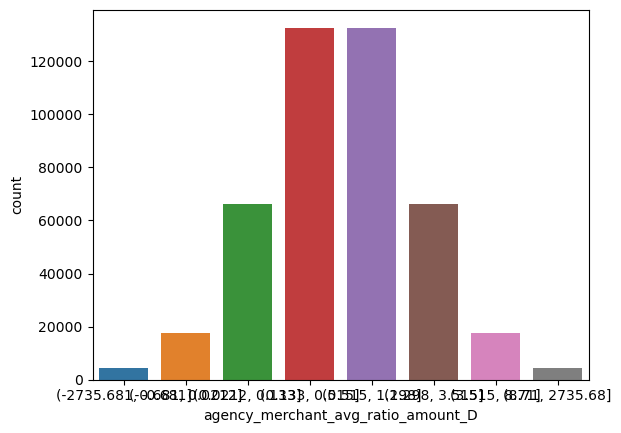

In [18]:
sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)

[Text(0, 0, '(-2735.681, -0.681]'),
 Text(1, 0, '(-0.681, 0.0212]'),
 Text(2, 0, '(0.0212, 0.133]'),
 Text(3, 0, '(0.133, 0.515]'),
 Text(4, 0, '(0.515, 1.298]'),
 Text(5, 0, '(1.298, 3.515]'),
 Text(6, 0, '(3.515, 8.71]'),
 Text(7, 0, '(8.71, 2735.68]')]

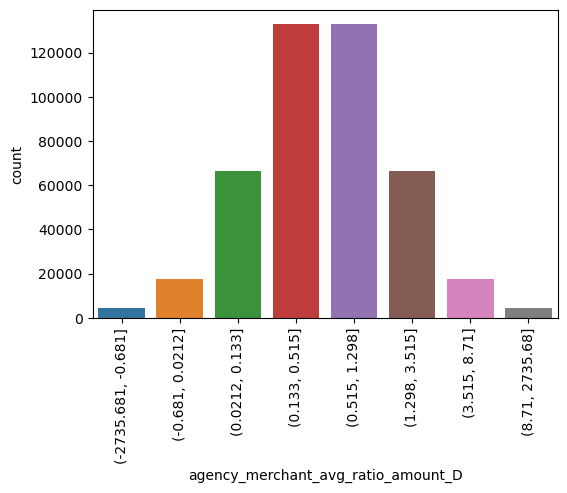

In [19]:
# rotate the labels in x-axis so they're not overlapped
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [20]:
df1[df1['agency_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,427.634060,2.081219,"(1.298, 3.515]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,392.641168,9.122833,"(8.71, 2735.68]"
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,170.060436,2.398265,"(1.298, 3.515]"


## 3.2 Feature 2: The Ratio to the Median Amount

In [21]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']

In [22]:
# add the new feature average spending to the dataset 
df2 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df2['agency_merchant_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
df2['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

In [23]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut( df2[var],percentile)

[Text(0, 0, '(-1003.177, -1.121]'),
 Text(1, 0, '(-1.121, 0.0653]'),
 Text(2, 0, '(0.0653, 0.362]'),
 Text(3, 0, '(0.362, 1.0]'),
 Text(4, 0, '(1.0, 2.691]'),
 Text(5, 0, '(2.691, 9.283]'),
 Text(6, 0, '(9.283, 28.085]'),
 Text(7, 0, '(28.085, 528116.053]')]

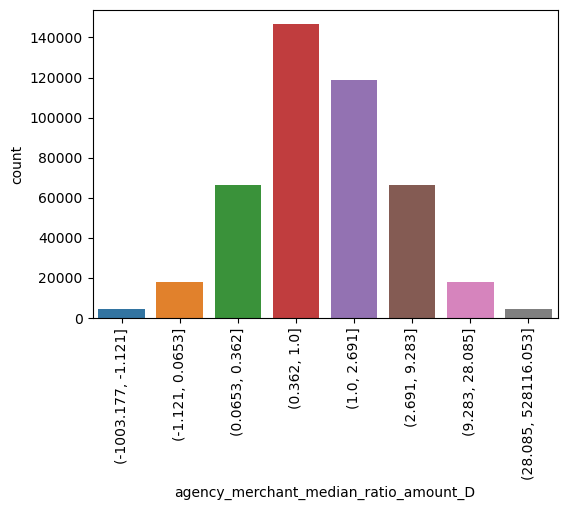

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [25]:
df2[df2['agency_merchant_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_median_ratio_amount,agency_merchant_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,250.000,3.560000,"(2.691, 9.283]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,32.485,2.967216,"(2.691, 9.283]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,181.940,2.167088,"(1.0, 2.691]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,187.000,3.060267,"(2.691, 9.283]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,91.500,4.863388,"(2.691, 9.283]"


## 3.3 Feature 3 : Creating a Binary Feature for High-Spending Category
   I want to create a binary feature indicating whether a transaction belongs to a high-spending category. We'll define a threshold for what constitutes a high-spending category, and transactions above this threshold will be marked as 1, and below or equal will be marked as 0.

In [26]:
# Define a threshold for high-spending category (you can adjust this based on your data)
threshold_amount = 500  # For example, transactions above $500 are considered high-spending

# Create a binary feature indicating high-spending category
df['HighSpendingCategory'] = df['Amount'].apply(lambda x: 1 if x > threshold_amount else 0)

I want to combine 'STATIONERY' and 'OFFICE SUPPLIES' into a single category 'BUSINESS SUPPLIES'.

In [27]:
# Combine 'STATIONERY' and 'OFFICE SUPPLIES' into 'BUSINESS SUPPLIES'
df['Merchant_Category'] = df['Merchant_Category'].replace({'STATIONERY': 'BUSINESS SUPPLIES', 'OFFICE SUPPLIES': 'BUSINESS SUPPLIES'})

In [28]:
df.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,1
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,0
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,0
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,0


## 3.4 Feature 4: Total Amount by Agency, Merchant Category, and Month
    This feature will represent the total transaction amount for each combination of agency, merchant category, and month.

In [29]:
df['Total_Amount_by_Agency_Merchant_Month'] = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].transform('sum')

In [30]:
df.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,1,43995.54
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,0,9082.90
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,0,79621.16
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,0,34351.23
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,0,61632.98


## 3.5 Feature 5: Average Amount by Agency, Merchant Category, and Month
This feature will represent the average transaction amount for each combination of agency, merchant category, and month.

In [31]:
df['Average_Amount_by_Agency_Merchant_Month'] = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].transform('mean')

In [32]:
df.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,1,43995.54,483.467473
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,0,9082.90,363.316000
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,0,79621.16,392.222463
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,0,34351.23,54.011368
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,0,61632.98,257.878577


### These features (4 and 5) will provide insights into the transaction amounts based on the combination of agency, merchant category, and month. 

## 3.6 Feature 6 : Day of the Week
   I'll create a feature indicating which day of the week the transaction occurred on.

In [33]:
# Create a feature for Day of the Week
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek  # Monday: 0, Sunday: 6
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,1,1,43995.54,483.467473
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,1,0,9082.90,363.316000
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,0,0,79621.16,392.222463
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,1,0,34351.23,54.011368
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,1,0,61632.98,257.878577


## 3.7 Feature 7: Week of the Month
   I'll create a feature representing which week of the month the transaction belongs to.

In [34]:
# Create a feature for Week of the Month
df['Week_of_Month'] = df['Transaction_Date'].apply(lambda x: (x.day - 1) // 7 + 1)
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,1,1,43995.54,483.467473,5
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,1,0,9082.90,363.316000,5
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,0,0,79621.16,392.222463,5
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,1,0,34351.23,54.011368,5
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,1,0,61632.98,257.878577,5


## 3.8 Feature 8 : Weekend Transactions
   
  I'll create a binary feature indicating whether the transaction occurred on a weekend (Saturday or Sunday).

In [35]:
# Create a binary feature for Weekend Transactions
df['Weekend_Transactions'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)  # 5 and 6 correspond to Saturday and Sunday
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,1,1,43995.54,483.467473,5,0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,1,0,9082.90,363.316000,5,0
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,0,0,79621.16,392.222463,5,0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,1,0,34351.23,54.011368,5,0
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,1,0,61632.98,257.878577,5,0


## 3.9 Feature 9 : Month-End Transactions
   
   I'll create a binary feature indicating whether the transaction occurred near the end of the month.

In [36]:
# Create a binary feature for Month-End Transactions (last 5 days of the month)
df['Month_End_Transactions'] = df['Transaction_Date'].apply(lambda x: 1 if x.day > (x.days_in_month - 5) else 0)
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Year,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions,Month_End_Transactions
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,2013,7,31,1,1,43995.54,483.467473,5,0,1
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,2013,7,31,1,0,9082.90,363.316000,5,0,1
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,2013,7,31,0,0,79621.16,392.222463,5,0,1
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,2013,7,31,1,0,34351.23,54.011368,5,0,1
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,2013,7,31,1,0,61632.98,257.878577,5,0,1


### These features (6 to 9) will provide valuable insights into the timing and occurrence of transactions within a week and a month. 

## 3.10 Feature 10 : Transaction Frequency by Cardholder

   I'll create Number of transactions made by each cardholder. This can give insights into the activity of each cardholder.

In [37]:
# Transaction Frequency by Cardholder
df['Transaction_Frequency_Cardholder'] = df.groupby('Cardholder_Last_Name')['Transaction_Date'].transform('count')
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Month,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions,Month_End_Transactions,Transaction_Frequency_Cardholder
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,7,31,1,1,43995.54,483.467473,5,0,1,229
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,7,31,1,0,9082.90,363.316000,5,0,1,229
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,7,31,0,0,79621.16,392.222463,5,0,1,291
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,7,31,1,0,34351.23,54.011368,5,0,1,291
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,7,31,1,0,61632.98,257.878577,5,0,1,71


## 3.11 Feature 11 : Transaction Frequency by Vendor

   I'll create Number of transactions with each vendor. This can provide insights into popular vendors or potential partnerships.

In [38]:
# Transaction Frequency by Vendor
df['Transaction_Frequency_Vendor'] = df.groupby('Vendor')['Transaction_Date'].transform('count')
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Week_Number,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions,Month_End_Transactions,Transaction_Frequency_Cardholder,Transaction_Frequency_Vendor
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,31,1,1,43995.54,483.467473,5,0,1,229,9
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,31,1,0,9082.90,363.316000,5,0,1,229,159
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,31,0,0,79621.16,392.222463,5,0,1,291,118
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,31,1,0,34351.23,54.011368,5,0,1,291,2548
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,31,1,0,61632.98,257.878577,5,0,1,71,1450


## 3.12 Feature 12 : Average Transaction Amount by Vendor

I'll create Average transaction amount for each vendor. This can indicate the typical spending amount for transactions with a specific vendor.

In [39]:
# Average Transaction Amount by Vendor
df['Average_Transaction_Amount_Vendor'] = df.groupby('Vendor')['Amount'].transform('mean')
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Day_of_Week,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions,Month_End_Transactions,Transaction_Frequency_Cardholder,Transaction_Frequency_Vendor,Average_Transaction_Amount_Vendor
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,1,1,43995.54,483.467473,5,0,1,229,9,715.555556
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,1,0,9082.90,363.316000,5,0,1,229,159,214.383270
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,0,0,79621.16,392.222463,5,0,1,291,118,163.750339
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,1,0,34351.23,54.011368,5,0,1,291,2548,62.405600
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,1,0,61632.98,257.878577,5,0,1,71,1450,144.875697


## 3.13 Feature 13 : Transaction Frequency by Day of the Week

I'll creat Number of transactions on each day of the week. This can reveal patterns in spending behavior throughout the week.

In [40]:
# Transaction Frequency by Day of the Week
df['Transaction_Frequency_Day_of_Week'] = df.groupby('Day_of_Week')['Transaction_Date'].transform('count')
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,HighSpendingCategory,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions,Month_End_Transactions,Transaction_Frequency_Cardholder,Transaction_Frequency_Vendor,Average_Transaction_Amount_Vendor,Transaction_Frequency_Day_of_Week
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,1,43995.54,483.467473,5,0,1,229,9,715.555556,86919
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,0,9082.90,363.316000,5,0,1,229,159,214.383270,86919
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,0,79621.16,392.222463,5,0,1,291,118,163.750339,61809
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,0,34351.23,54.011368,5,0,1,291,2548,62.405600,86919
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,0,61632.98,257.878577,5,0,1,71,1450,144.875697,86919


## 3.14 Feature 14 : Transaction Frequency by Merchant Category

I'll create Number of transactions in each merchant category. This can give an overview of spending in different categories.

In [41]:
# Transaction Frequency by Merchant Category
df['Transaction_Frequency_Merchant_Category'] = df.groupby('Merchant_Category')['Transaction_Date'].transform('count')
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Total_Amount_by_Agency_Merchant_Month,Average_Amount_by_Agency_Merchant_Month,Week_of_Month,Weekend_Transactions,Month_End_Transactions,Transaction_Frequency_Cardholder,Transaction_Frequency_Vendor,Average_Transaction_Amount_Vendor,Transaction_Frequency_Day_of_Week,Transaction_Frequency_Merchant_Category
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,43995.54,483.467473,5,0,1,229,9,715.555556,86919,3866
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,9082.90,363.316000,5,0,1,229,159,214.383270,86919,734
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,79621.16,392.222463,5,0,1,291,118,163.750339,61809,6994
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,34351.23,54.011368,5,0,1,291,2548,62.405600,86919,17152
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,61632.98,257.878577,5,0,1,71,1450,144.875697,86919,24860


## 3.15 Feature 15 : Identify Transaction Amount Outliners by Merchant Category

To identify abnormal amount outliers within each category, I plan to calculate the z-score for the 'Amount' within each category. The z-score measures how many standard deviations an observation is from the mean. High z-scores indicate values significantly far from the mean and can be considered outliers.

Here's my thought process on creating a feature that represents abnormal amount outliers using z-scores within each category:

- Calculate z-score for 'Amount' within each category
- Calculate the z-score for the 'Amount' within each merchant category.
- Flag outliers based on z-score threshold:
- Flag transactions as outliers if the z-score exceeds a certain threshold (e.g., 3 standard deviations).

In [42]:
# Calculate z-score for 'Amount' within each category
df['Z_Score_Amount_by_Category'] = df.groupby('Merchant_Category')['Amount'].transform(lambda x: (x - x.mean()) / x.std())

In [43]:
# Set a threshold for z-score to flag outliers (e.g., 3 standard deviations)
z_score_threshold = 3

# Create a binary feature indicating abnormal amount outliers
df['Abnormal_Amount_Outlier'] = np.where(np.abs(df['Z_Score_Amount_by_Category']) > z_score_threshold, 1, 0)

# Display the unique values in the new feature
print(df['Abnormal_Amount_Outlier'].value_counts())

0    437182
1      5276
Name: Abnormal_Amount_Outlier, dtype: int64


In [44]:
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Week_of_Month,Weekend_Transactions,Month_End_Transactions,Transaction_Frequency_Cardholder,Transaction_Frequency_Vendor,Average_Transaction_Amount_Vendor,Transaction_Frequency_Day_of_Week,Transaction_Frequency_Merchant_Category,Z_Score_Amount_by_Category,Abnormal_Amount_Outlier
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,5,0,1,229,9,715.555556,86919,3866,0.475815,0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,5,0,1,229,159,214.383270,86919,734,-0.021273,0
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,5,0,1,291,118,163.750339,61809,6994,-0.225583,0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,5,0,1,291,2548,62.405600,86919,17152,0.161073,0
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,5,0,1,71,1450,144.875697,86919,24860,-0.150785,0


# Section 4 Project Finalization

## 4.1 Merge df1, df2 into my dataframe 
so feature 1 and 2 are showing in one table as other features

In [47]:
# Merge 'agency_merchant_avg_ratio_amount' from df1
df['agency_merchant_avg_ratio_amount'] = df1['agency_merchant_avg_ratio_amount']

# Merge 'agency_merchant_median_ratio_amount' from df2
df['agency_merchant_median_ratio_amount'] = df2['agency_merchant_median_ratio_amount']

# Display the updated DataFrame with the added features
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Month_End_Transactions,Transaction_Frequency_Cardholder,Transaction_Frequency_Vendor,Average_Transaction_Amount_Vendor,Transaction_Frequency_Day_of_Week,Transaction_Frequency_Merchant_Category,Z_Score_Amount_by_Category,Abnormal_Amount_Outlier,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,1,229,9,715.555556,86919,3866,0.475815,0,2.081219,3.560000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,1,229,159,214.383270,86919,734,-0.021273,0,0.974461,1.407761
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,1,291,118,163.750339,61809,6994,-0.225583,0,0.422515,0.966824
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,1,291,2548,62.405600,86919,17152,0.161073,0,1.611007,2.967216
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,1,71,1450,144.875697,86919,24860,-0.150785,0,0.464432,1.143895


## 4.2 Summary
 
 - Feature Engineering for Anomaly Detection in Credit Card Transactions

In this project, I conducted extensive feature engineering to enhance my understanding of credit card transaction data for anomaly detection in an unsupervised machine learning model. The focus was on creating insightful features that contribute to identifying potential anomalies within the dataset.

**Category: Ratio and Statistics of Transaction Amount**

1. **Feature 1: Ratio to Average Amount**
   - Description: Ratio of each transaction amount to the average amount in the dataset.
2. **Feature 2: Ratio to Median Amount**
   - Description: Ratio of each transaction amount to the median amount in the dataset.

**Category: Transaction Amount Analysis**

3. **Feature 3: High-Spending Category Binary Indicator**
   - Description: Binary feature indicating whether a transaction belongs to a high-spending category.
4. **Feature 4: Total Amount by Agency, Merchant Category, and Month**
   - Description: Aggregated total transaction amount based on agency, merchant category, and month.
5. **Feature 5: Average Amount by Agency, Merchant Category, and Month**
   - Description: Average transaction amount calculated based on agency, merchant category, and month.

**Category: Temporal Analysis**

6. **Feature 6: Day of the Week**
   - Description: Indicates the day of the week on which the transaction occurred.
7. **Feature 7: Week of the Month**
   - Description: Represents the week number within a month in which the transaction took place.
8. **Feature 8: Weekend Transactions**
   - Description: Binary feature indicating whether the transaction occurred on a weekend.
9. **Feature 9: Month-End Transactions**
   - Description: Binary feature indicating whether the transaction occurred near the end of the month, often associated with salary periods.

**Category: Transaction Frequency Analysis**

10. **Feature 10: Transaction Frequency by Cardholder**
    - Description: Frequency of transactions by each cardholder.
11. **Feature 11: Transaction Frequency by Vendor**
    - Description: Frequency of transactions with each vendor.
12. **Feature 12: Average Transaction Amount by Vendor**
    - Description: Average transaction amount for each vendor.
13. **Feature 13: Transaction Frequency by Day of the Week**
    - Description: Frequency of transactions for each day of the week.
14. **Feature 14: Transaction Frequency by Merchant Category**
    - Description: Frequency of transactions for each merchant category.

**Category: Outlier Detection**

15. **Feature 15: Identify Transaction Amount Outliers by Merchant Category**
    - Description: Utilizes statistical analysis to identify potential outliers in transaction amounts within each merchant category.

These features collectively offer valuable insights into transaction behaviors, patterns, and potential anomalies, enhancing the dataset's information content. A robust set of features is critical for building an effective unsupervised machine learning model for anomaly detection in credit card transactions.